In [1]:
from utils.functions import precios
import pandas as pd
pd.set_option('max_colwidth', 100)
import numpy as np
import regex as re
import random
import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams["figure.figsize"] = (15,6)

### Imporing sentiment DF, and ticker prices (yfinance)

In [2]:
import pandas as pd
df_sent = pd.read_csv('data/final_data.csv')
df_sent = df_sent[df_sent['date'] >= '2023-03-17']
df_sent.tail(5)

,date,ticker,link,articles,spacy_summary,pegasus_one_line,sentiment
1059,2023-03-18,GC=F,https://finance.yahoo.com//news/president-petro-t-afford-ban-150000305.html,A contentious move by Colombia’s first leftist President Gustavo Petro to end hydrocarbon explor...,"Oil spills and other incidents became common place, especially as leftist guerillas stepped up a...",Colombia’s dependence on crude oil generates significant community dissent.,-1
1060,2023-03-17,GC=F,https://finance.yahoo.com//news/10-best-copper-stocks-buy-214215168.html,"In this article, we discuss 10 best copper stocks to buy for 2023. If you want to see more stock...",Referring to a shortage of resources and a significant requirement for copper in the renewable e...,CEO says ‘something to have to have in your portfolio’. Taseko’s primary focus is on copper conc...,0
1061,2023-03-17,GC=F,https://finance.yahoo.com//news/global-markets-global-equities-fall-205500518.html,"(Updates prices throughout) * Wall Street, European stock indexes fall * First Republic Bank get...","Fed data on Thursday showed banks sought record amounts of emergency liquidity in recent days, w...",Silicon Valley Bank lost confidence last Friday. First Republic gets $30 billion in emergency de...,-1
1062,2023-03-17,GC=F,https://finance.yahoo.com//news/global-markets-global-equities-fall-185128647.html,"(New throughout with updated prices, comment) * Wall Street, European stock indexes fall * First...","Fed data on Thursday showed banks sought record amounts of emergency liquidity in recent days, w...",First Republic Bank gets $30 billion in deposits from Wall Street. U.S. consumer sentiment falls...,-1
1063,2023-03-17,GC=F,https://finance.yahoo.com//news/svb-collapse-shows-rot-u-151545776.html,"It’s common knowledge that banks are the safest place to store your money, but the run on Silico...","Instead of holding “dollar” balances in bank accounts that may or may not be real dollars, we co...",Hold ‘dollar’ in principle: U.S. Treasury,0


In [3]:
df_prices = precios(start='2023-03-17',end='2023-03-30',tickers=df_sent.ticker.unique())
df_prices.Date = pd.to_datetime(df_prices.Date)

['aapl' 'tsla' 'goog' 'jnj' 'BTC-USD' 'amzn' 'msft' 'GC=F']


### Comparing mean count of words in each step.

In [4]:
df_sent['Raw articles'] = df_sent.articles.apply(lambda x: len(x.split(' ')))
df_sent['Extractive summary'] = df_sent.spacy_summary.apply(lambda x: len(x.split(' ')))
df_sent['One line'] = df_sent.pegasus_one_line.apply(lambda x: len(x.split(' ')))

print('Raw articles :', np.mean(df_sent['Raw articles']))
print('Extractive summary :', np.mean(df_sent['Extractive summary']))
print('One line :', np.mean(df_sent['One line']))

Raw articles : 721.175983436853
Extractive summary : 208.9151138716356
One line : 15.082815734989648


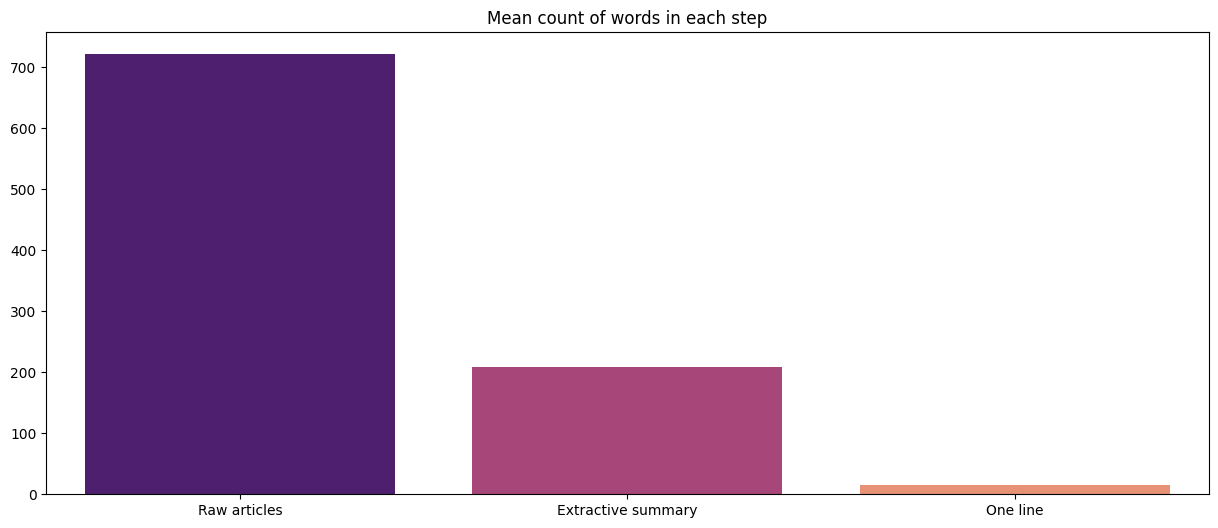

In [5]:
sns.barplot(data=df_sent[['Raw articles','Extractive summary','One line']],palette='magma',errorbar=None)
plt.title('Mean count of words in each step');

### Sentiment

In [6]:
df_sent = pd.read_csv('data/final_data.csv')
df_sent

,date,ticker,link,articles,spacy_summary,pegasus_one_line,sentiment
0,2023-03-29,aapl,https://finance.yahoo.com//news/binance-investors-withdraw-enforcement-action-us-regulators-1133...,"Investors have pulled out $2bn (£1.62bn) from Binance over the past week, according to crypto an...","According to digital asset data provider Kaiko, the level of market dominance that Binance holds...",Nansen overtakes Samsung as largest crypto data provider. Publicly disclosed unregistered crypto...,1
1,2023-03-29,aapl,https://finance.yahoo.com//news/apple-inc-nasdaq-aapl-intrinsic-110123495.html,"Using the 2 Stage Free Cash Flow to Equity, Apple fair value estimate is US$120 Apple is estimat...","We assume companies with shrinking free cash flow will slow their rate of shrinkage, and that co...",Apple has a 2 stage free cash flow value of US$1.9t.,0
2,2023-03-29,aapl,https://finance.yahoo.com//news/apple-pay-later-affirm-klarna-091700811.html,"Apple is finally ready to hand out loans to its users, nine months since first teasing the servi...","The so-called Buy Now Pay Later (BNPL) service allows users to “easily track, manage, and repay ...","Users can apply for loans of up to $1,000. Apple Pay Later service is available in the U.S.",0
3,2023-03-28,aapl,https://finance.yahoo.com//news/apple-gangnam-welcome-first-customers-230000658.html,Apple celebrates the dynamic Gangnam District with a special Today at Apple session featuring K-...,"Apple, the Apple logo, Today at Apple, iPhone, Apple Pay, GarageBand, Mac, Apple Music, Apple TV...","Gangnam District in Seoul, South Korea to host Apple TV, Apple Music Store.",0
4,2023-03-28,aapl,https://finance.yahoo.com//news/apple-starts-roll-pay-later-214437026.html,"(Bloomberg) -- Apple Inc. began rolling out its first “buy now, pay later”-style service after a...","The iPhone maker also rolled out Apple Music Classical, a new streaming service that works with ...","Users will be able to borrow up to $1,000 via the app. Music streaming service adds new features...",1
...,...,...,...,...,...,...,...
1059,2023-03-18,GC=F,https://finance.yahoo.com//news/president-petro-t-afford-ban-150000305.html,A contentious move by Colombia’s first leftist President Gustavo Petro to end hydrocarbon explor...,"Oil spills and other incidents became common place, especially as leftist guerillas stepped up a...",Colombia’s dependence on crude oil generates significant community dissent.,-1
1060,2023-03-17,GC=F,https://finance.yahoo.com//news/10-best-copper-stocks-buy-214215168.html,"In this article, we discuss 10 best copper stocks to buy for 2023. If you want to see more stock...",Referring to a shortage of resources and a significant requirement for copper in the renewable e...,CEO says ‘something to have to have in your portfolio’. Taseko’s primary focus is on copper conc...,0
1061,2023-03-17,GC=F,https://finance.yahoo.com//news/global-markets-global-equities-fall-205500518.html,"(Updates prices throughout) * Wall Street, European stock indexes fall * First Republic Bank get...","Fed data on Thursday showed banks sought record amounts of emergency liquidity in recent days, w...",Silicon Valley Bank lost confidence last Friday. First Republic gets $30 billion in emergency de...,-1
1062,2023-03-17,GC=F,https://finance.yahoo.com//news/global-markets-global-equities-fall-185128647.html,"(New throughout with updated prices, comment) * Wall Street, European stock indexes fall * First...","Fed data on Thursday showed banks sought record amounts of emergency liquidity in recent days, w...",First Republic Bank gets $30 billion in deposits from Wall Street. U.S. consumer sentiment falls...,-1


In [7]:
df_sent = df_sent[['date','ticker','sentiment']]
df_sent.date = pd.to_datetime(df_sent['date'])
# Filtering articles by date.
df_sent = df_sent[(df_sent['date'] > '2023-03-16' )]
df_sent

C:\Users\Han\AppData\Local\Temp\ipykernel_3064\144439015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sent.date = pd.to_datetime(df_sent['date'])


,date,ticker,sentiment
0,2023-03-29,aapl,1
1,2023-03-29,aapl,0
2,2023-03-29,aapl,0
3,2023-03-28,aapl,0
4,2023-03-28,aapl,1
...,...,...,...
1059,2023-03-18,GC=F,-1
1060,2023-03-17,GC=F,0
1061,2023-03-17,GC=F,-1
1062,2023-03-17,GC=F,-1


### Combining sentiment and price in a line chart.

Text(0.5, 0.98, 'Plot sentimient and price')

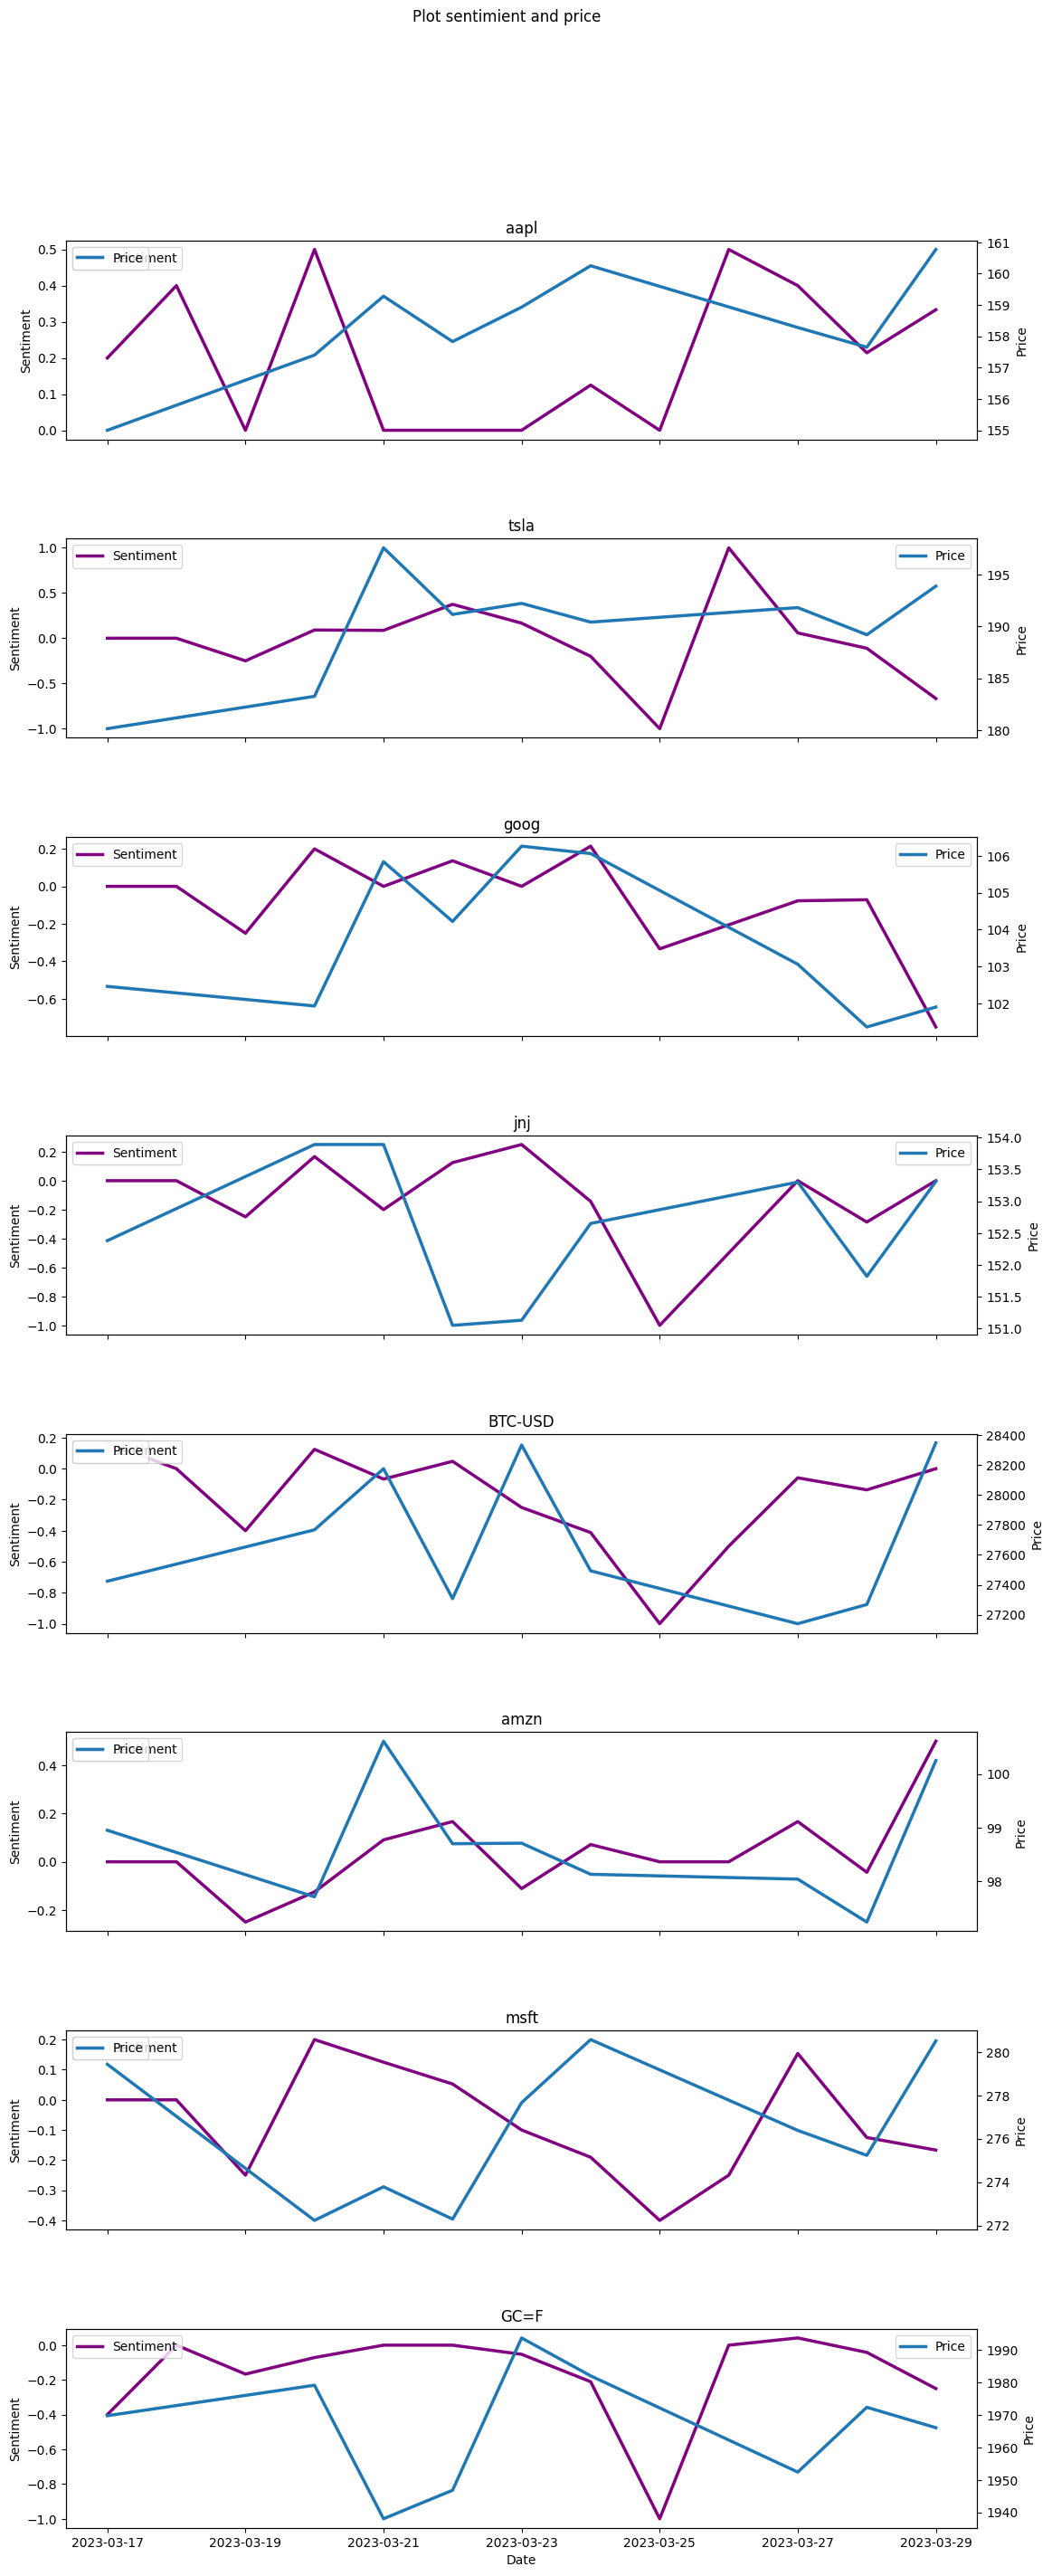

In [8]:
# Fig and axis for subplots
num_rows = len(df_sent.ticker.unique())
fig, axs = plt.subplots(num_rows, 1, figsize=(13, 4*num_rows), sharex='col',gridspec_kw={'top': 0.9})
plt.subplots_adjust(hspace=0.5)

for i, tick in enumerate(df_sent.ticker.unique()):
    
    # Creating a subplot for sentiment data with ticker label
    ax1 = axs[i]
    sns.lineplot(ax=ax1, data=df_sent[df_sent['ticker'] == tick], y='sentiment', x='date',
                  hue='ticker', palette=['purple'], linewidth=2.5,errorbar=('ci', False),legend=False,label='Sentiment')
    ax1.legend(loc='upper left')

    # Creating a subplot for price data with ticker label
    ax2 = ax1.twinx()
    sns.lineplot(ax=ax2, data=df_prices[['Date', tick]], y=tick, x='Date', linewidth=2.5,label='Price',errorbar=('ci', False))
    
    # Setting titles and labels for the subplots
    ax1.set_title(tick)
    ax1.set_ylabel('Sentiment')
    ax2.set_ylabel('Price')
    
#Setting x-axis label for the last subplot
axs[num_rows-1].set_xlabel('Date')

# Title for the entire plot
plt.suptitle('Plot sentimient and price')


### Stacked bar plot to compare the count of sentiment for our tickers

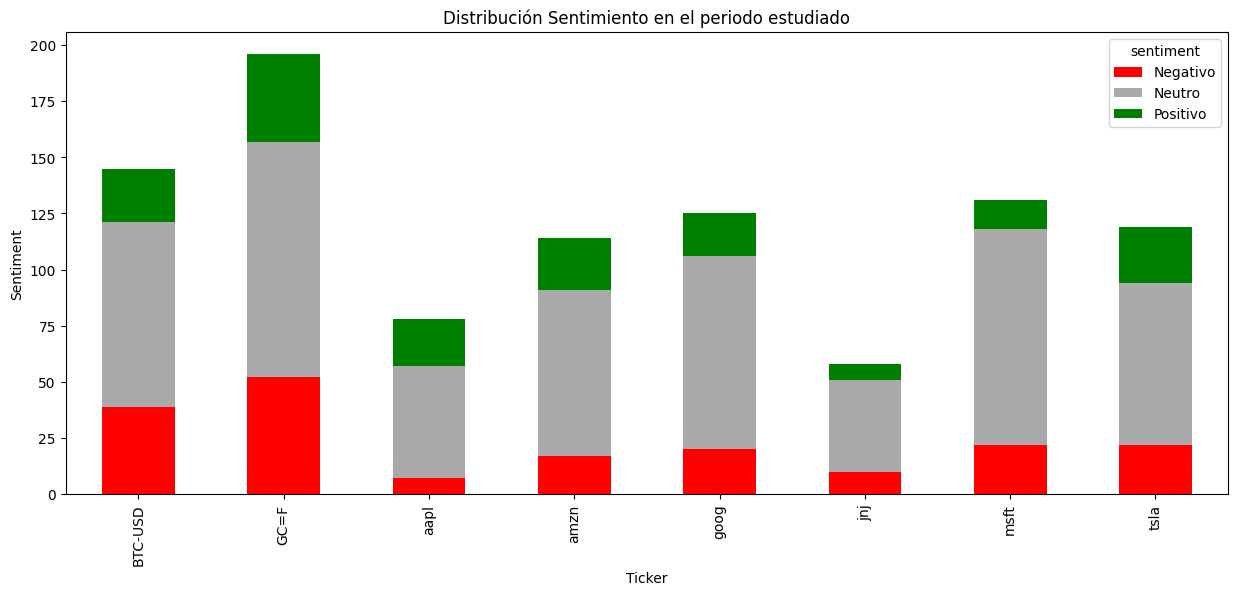

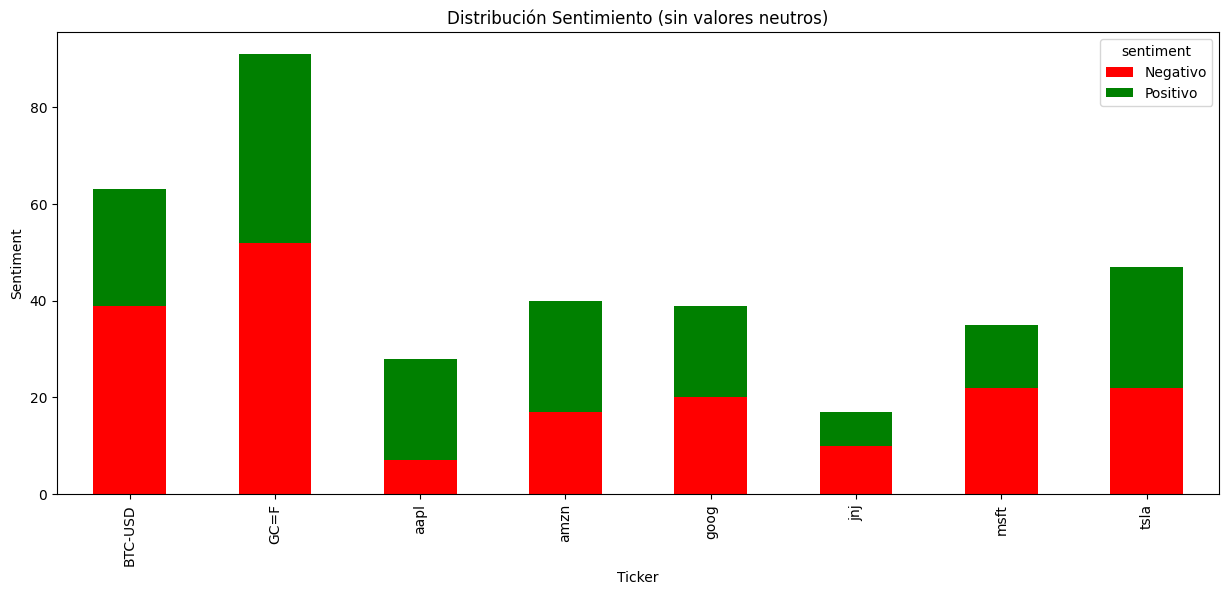

In [9]:
df_crosstab = df_sent.copy()
df_crosstab['sentiment'].replace({1:'Positivo',0:'Neutro',-1:'Negativo'},inplace=True)


pd.crosstab(df_crosstab['ticker'], df_crosstab['sentiment']).plot(kind='bar',
                                                                  stacked=True,color=['red','darkgrey','green'],
                                                                  )
plt.title('Distribución Sentimiento en el periodo estudiado')
plt.xlabel('Ticker')
plt.ylabel('Sentiment');

# Excluding neutral values.

df_no_neutral = df_crosstab.copy()
df_no_neutral = df_no_neutral[df_no_neutral.sentiment != 'Neutro']

pd.crosstab(df_no_neutral['ticker'], df_no_neutral['sentiment']).plot(kind='bar',
                                                                  stacked=True,color=['red','green'],
                                                                  )
plt.title('Distribución Sentimiento (sin valores neutros)')
plt.xlabel('Ticker')
plt.ylabel('Sentiment');

# Correlación

In [10]:
# Using pivot_table to combine sentiment and price dataframes
df_pivot = pd.pivot_table(df_sent, values='sentiment', index='date', columns='ticker').reset_index().sort_values('date')

# Using interpolate instead of bfill to impute mean values between NaNs
df_pivot.iloc[:,1:] = df_pivot.iloc[:,1:].interpolate(axis=1)
df_pivot.fillna(method='bfill',inplace=True)

# Adding '_sentiment' suffix to column names
df_pivot.columns += '_sentiment'
df_pivot.head(40)

ticker,date_sentiment,BTC-USD_sentiment,GC=F_sentiment,aapl_sentiment,amzn_sentiment,goog_sentiment,jnj_sentiment,msft_sentiment,tsla_sentiment
0,2023-03-17,0.166667,-0.400000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2023-03-18,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2023-03-19,-0.400000,-0.166667,0.000000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000
3,2023-03-20,0.125000,-0.071429,0.500000,-0.125000,0.200000,0.166667,0.200000,0.090909
4,2023-03-21,-0.066667,0.000000,0.000000,0.090909,0.000000,-0.200000,0.125000,0.086957
5,2023-03-22,0.047619,0.000000,0.000000,0.166667,0.136364,0.125000,0.052632,0.375000
6,2023-03-23,-0.250000,-0.052632,0.000000,-0.111111,0.000000,0.250000,-0.100000,0.166667
7,2023-03-24,-0.411765,-0.210526,0.125000,0.071429,0.214286,-0.142857,-0.190476,-0.200000
8,2023-03-25,-1.000000,-1.000000,0.000000,0.000000,-0.333333,-1.000000,-0.400000,-1.000000
9,2023-03-26,-0.500000,0.000000,0.500000,0.000000,-0.083333,-0.166667,-0.250000,1.000000


In [11]:
# Combining dataframes to get the correlation matrix.
merged_df = pd.merge(df_pivot, df_prices, right_on='Date',left_on='date_sentiment').drop(columns='Date')
merged_df.head(3)

,date_sentiment,BTC-USD_sentiment,GC=F_sentiment,aapl_sentiment,amzn_sentiment,goog_sentiment,jnj_sentiment,msft_sentiment,tsla_sentiment,aapl,tsla,goog,jnj,BTC-USD,amzn,msft,GC=F
0,2023-03-17,0.166667,-0.400000,0.2,0.000000,0.0,0.000000,0.000,0.000000,155.000000,180.130005,102.459999,152.380005,27423.929688,98.949997,279.429993,1969.800049
1,2023-03-20,0.125000,-0.071429,0.5,-0.125000,0.2,0.166667,0.200,0.090909,157.399994,183.250000,101.930000,153.889999,27767.236328,97.709999,272.230011,1979.199951
2,2023-03-21,-0.066667,0.000000,0.0,0.090909,0.0,-0.200000,0.125,0.086957,159.279999,197.580002,105.839996,153.889999,28175.816406,100.610001,273.779999,1938.000000


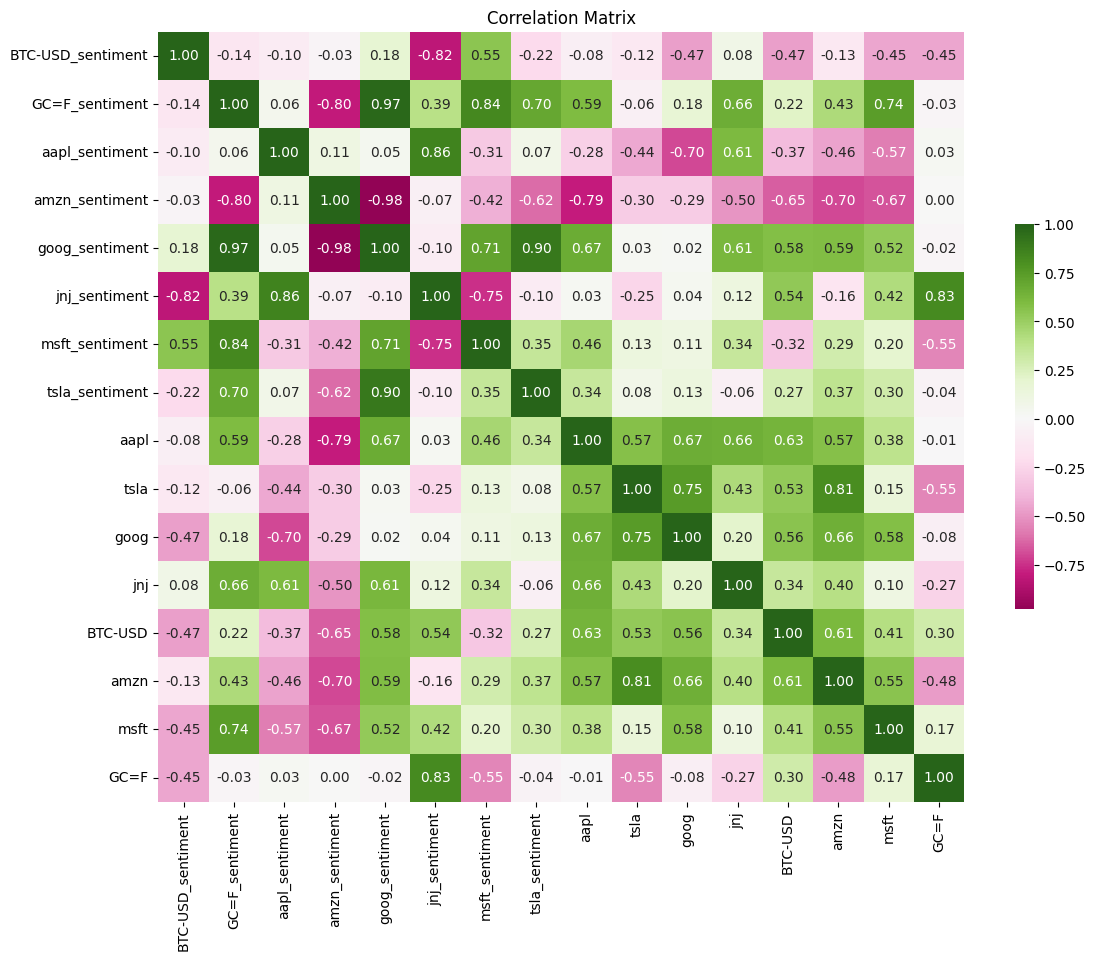

In [12]:
# Matriz de correlación y heatmap
corr_matrix = merged_df.iloc[:,1:].pct_change().corr()
fig,ax = plt.subplots(figsize=(13,10))
sns.heatmap(corr_matrix, cmap="PiYG", fmt='.2f',annot=True,center=0,cbar_kws={'shrink':.5})
plt.title("Correlation Matrix")
plt.show()